# 💳 Detección de Fraude Financiero con Aprendizaje Automático · Proyecto Interdisciplinario

Este proyecto forma parte de mi portafolio profesional como analista certificado por Google en Ciencia de Datos, Business Intelligence y UX.  
Aplicamos técnicas de balanceo con SMOTE y algoritmos de Machine Learning para identificar transacciones fraudulentas sobre un dataset real de tarjetas de crédito.

📊 Dataset: Credit Card Fraud Detection  
📦 Fuente: Kaggle · mlg-ulb  
🧠 Algoritmo principal: Random Forest  
⚖️ Balanceo de clases: SMOTE  
📈 Métricas y visualizaciones: Matriz de confusión · Curva ROC · Heatmap

---

**Objetivo:**  
Detectar con precisión transacciones fraudulentas en tiempo real, optimizando la sensibilidad del modelo y reduciendo falsos positivos.  

🧠 Portfolio Profesional · Proyecto 1 de 5 bloques temáticos multidisciplinarios


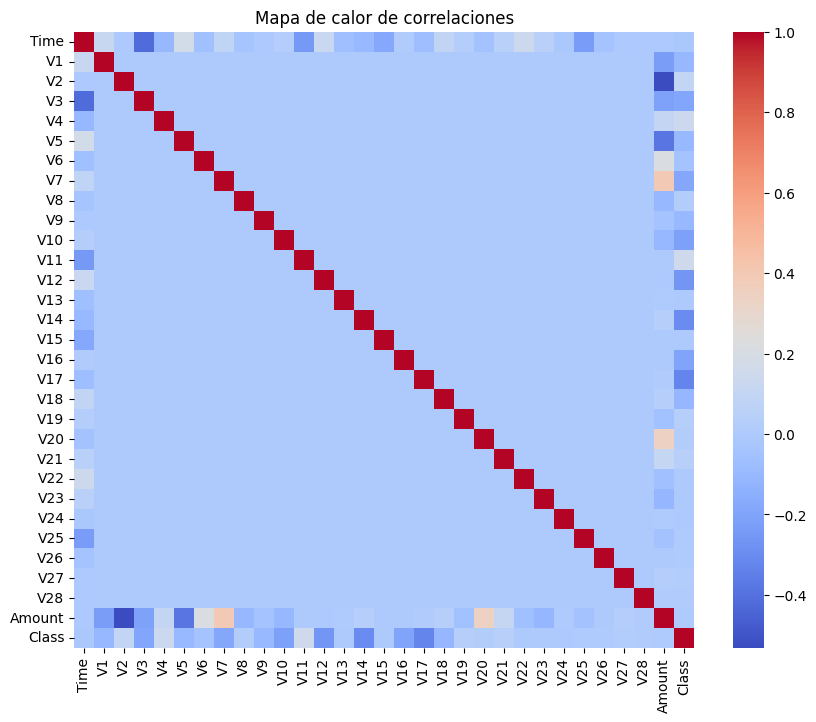

ModuleNotFoundError: No module named 'sklearn.utils._metadata_requests'

In [4]:
# 📦 Carga de datos
import pandas as pd
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

# 📊 Correlaciones rápidas
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Mapa de calor de correlaciones")
plt.show()

# ⚖️ Balanceo de clases con SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Variables
X = df.drop('Class', axis=1)
y = df['Class']

# División con estratificación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# SMOTE
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

# 🧠 Modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_bal, y_train_bal)
y_pred = rf.predict(X_val)

# 📋 Métricas
print("Reporte de clasificación:\n")
print(classification_report(y_val, y_pred))

# 🧱 Matriz de confusión
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# 📈 Curva ROC
y_prob = rf.predict_proba(X_val)[:,1]
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', linestyle='--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()


In [5]:
!pip install -U scikit-learn imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 77.7 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [6]:
from imblearn.over_sampling import SMOTE


ImportError: cannot import name 'UnsetMetadataPassedError' from 'sklearn.exceptions' (/usr/local/lib/python3.11/dist-packages/sklearn/exceptions.py)

In [7]:
!pip install --upgrade scikit-learn imbalanced-learn


  Using cached scikit_learn-1.7.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (17 kB)


In [8]:
from imblearn.over_sampling import SMOTE


ImportError: cannot import name 'UnsetMetadataPassedError' from 'sklearn.exceptions' (/usr/local/lib/python3.11/dist-packages/sklearn/exceptions.py)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



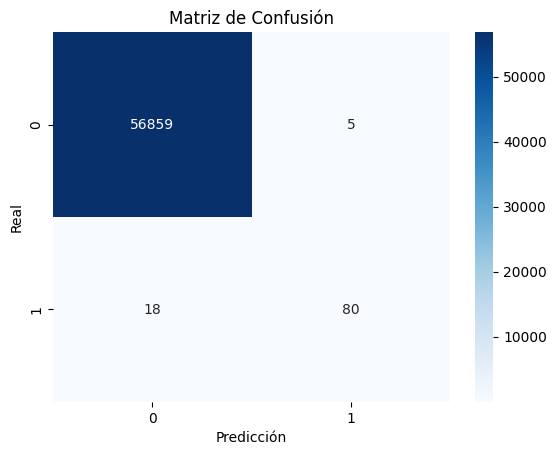

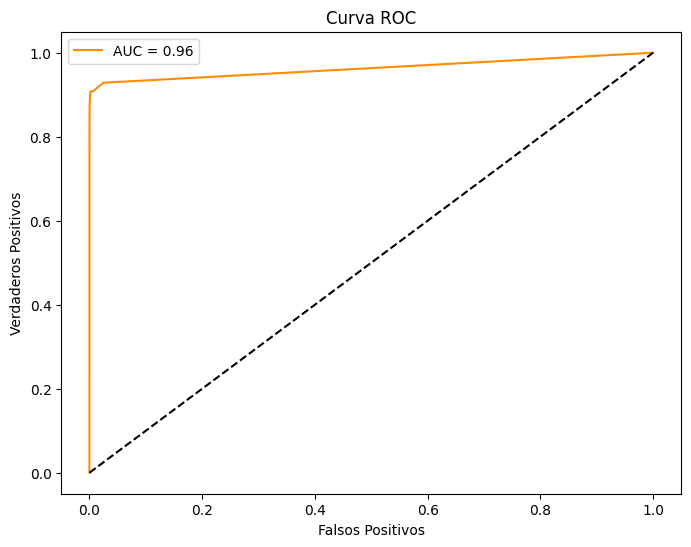

In [9]:
# 📦 Carga de datos
import pandas as pd
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

# 📊 Preparación
X = df.drop('Class', axis=1)
y = df['Class']

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 🧠 Modelo
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

# 📋 Métricas
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_val, y_pred))

# 🧱 Matriz de confusión
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# 📈 Curva ROC
y_prob = rf.predict_proba(X_val)[:,1]
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="darkorange")
plt.plot([0,1],[0,1],'k--')
plt.title("Curva ROC")
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.legend()
plt.show()
